In [2]:
import georinex as gr
import numpy as np

# Указываем путь к файлу SP3
sp3_file_path = '../data/Sta30s22370.sp3'

# Загружаем данные из файла SP3
obs = gr.load(sp3_file_path)


In [3]:
print(obs)

<xarray.Dataset>
Dimensions:   (time: 2882, sv: 118, ECEF: 3)
Coordinates:
  * time      (time) datetime64[ns] 2022-11-20 ... 2022-11-21T00:00:30
  * sv        (sv) <U3 'C06' 'C07' 'C08' 'C09' 'C10' ... 'R21' 'R22' 'R24' 'R25'
  * ECEF      (ECEF) <U1 'x' 'y' 'z'
Data variables:
    position  (time, sv, ECEF) float64 -1.414e+04 3.937e+04 ... 8.172e+03
    clock     (time, sv) float64 -2.866 190.3 514.0 -802.9 ... 16.34 127.7 46.81
    velocity  (time, sv, ECEF) float64 0.0 2.228e-314 ... 5.931e-38 6.013e-154
    dclock    (time, sv) float64 2.228e-314 nan ... 3.191e+88 1.66e-76
Attributes:
    t0:          2022-11-20 00:00:00
    Nepoch:      2882
    coord_sys:   IGS14
    orbit_type:  FIT
    agency:       IAC


In [4]:
sat = obs.sel(sv='G13').dropna(dim='time', how='all')

In [5]:
print(sat)

<xarray.Dataset>
Dimensions:   (time: 2882, ECEF: 3)
Coordinates:
  * time      (time) datetime64[ns] 2022-11-20 ... 2022-11-21T00:00:30
    sv        <U3 'G13'
  * ECEF      (ECEF) <U1 'x' 'y' 'z'
Data variables:
    position  (time, ECEF) float64 -1.292e+04 1.358e+04 ... 1.291e+04 1.901e+04
    clock     (time) float64 427.6 427.6 427.6 427.6 ... 428.2 428.2 428.2 428.2
    velocity  (time, ECEF) float64 2.176e-76 3.704e-245 ... 1.041e-42 1.452e-47
    dclock    (time) float64 0.0 3.381e-57 7.12e-67 ... 4.663e-62 6.016e-67
Attributes:
    t0:          2022-11-20 00:00:00
    Nepoch:      2882
    coord_sys:   IGS14
    orbit_type:  FIT
    agency:       IAC


In [8]:
print(sat['position'])

<xarray.DataArray 'position' (time: 2882, ECEF: 3)>
array([[-12921.870442,  13575.53111 ,  18568.703902],
       [-12925.543589,  13503.424319,  18618.737053],
       [-12929.342031,  13431.134749,  18668.406477],
       ...,
       [-12951.845345,  13053.029655,  18919.640994],
       [-12956.436041,  12979.645848,  18967.037325],
       [-12961.157145,  12906.091029,  19014.063144]])
Coordinates:
  * time     (time) datetime64[ns] 2022-11-20 ... 2022-11-21T00:00:30
    sv       <U3 'G13'
  * ECEF     (ECEF) <U1 'x' 'y' 'z'


In [14]:
x = sat['position'][:, 0]
y = sat['position'][:, 1]
z = sat['position'][:, 2]

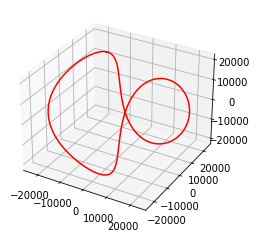

In [16]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

fig = plt.figure()
 
ax = plt.axes(projection="3d")

ax.plot3D(x, y, z, 'red')

plt.show()